In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
automobile_df = pd.read_csv("auto-mpg.csv")

In [3]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
314,26.4,4,140.0,88,2870,18.1,80,1,ford fairmont
262,19.2,8,305.0,145,3425,13.2,78,1,chevrolet monte carlo landau
178,23.0,4,120.0,88,2957,17.0,75,2,peugeot 504
68,13.0,8,350.0,155,4502,13.5,72,1,buick lesabre custom
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl


In [4]:
automobile_df.shape

(398, 9)

Treat spaces denoted by ? in the dataset to mean nan(not a number)

In [5]:
automobile_df = automobile_df.replace("?",np.nan)

USe dropna() function to remove a row or a column which has a NaN or no values in it

In [6]:
automobile_df = automobile_df.dropna()

In [7]:
automobile_df.shape

(392, 9)

Drop Columns which don't make sense as feautures

In [8]:
automobile_df.drop(["origin","car name"], axis =1, inplace= True)

In [9]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
143,26.0,4,97.0,78,2300,14.5,74
123,20.0,6,156.0,122,2807,13.5,73
196,24.5,4,98.0,60,2164,22.1,76
199,20.0,6,225.0,100,3651,17.7,76
182,28.0,4,107.0,86,2464,15.5,76


In [10]:
automobile_df["model year"] = "19" + automobile_df["model year"].astype(str)

In [11]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
162,15.0,6,258.0,110,3730,19.0,1975
250,19.4,8,318.0,140,3735,13.2,1978
292,18.5,8,360.0,150,3940,13.0,1979
316,19.1,6,225.0,90,3381,18.7,1980
314,26.4,4,140.0,88,2870,18.1,1980


Convert the model year to a complete year format

# Calculate and add an Age column

In [12]:
automobile_df["Age"] = datetime.datetime.now().year - pd.to_numeric(automobile_df["model year"])

In [13]:
automobile_df.drop(["model year"], axis=1, inplace=True)

In [14]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
251,20.2,8,302.0,139,3570,12.8,41
23,26.0,4,121.0,113,2234,12.5,49
327,36.4,5,121.0,67,2950,19.9,39
86,14.0,8,304.0,150,3672,11.5,46
183,25.0,4,116.0,81,2220,16.9,43


In [15]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
Age               int64
dtype: object

In [16]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
Age             392 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


Note that horsepower is object type(characters), we need to convert this to numeric type.

In [17]:
automobile_df["horsepower"] = pd.to_numeric(automobile_df["horsepower"], errors="coerce")

In [18]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
Age             392 non-null int64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


In [19]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,43.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,37.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,40.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,43.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,46.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,49.000000


# Visualisation Relationships

Text(0, 0.5, 'Miles per gallon')

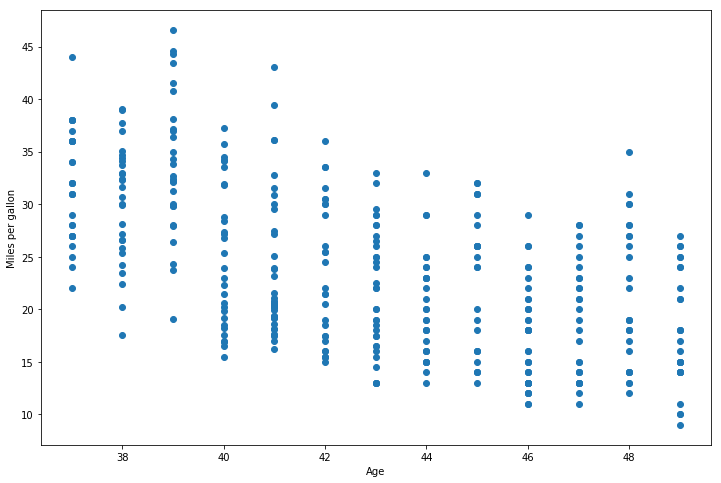

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["Age"], automobile_df["mpg"])

plt.xlabel("Age")
plt.ylabel("Miles per gallon")

Cars with lower age have higher mpg than cars with longer age

Text(0, 0.5, 'Miles per gallon')

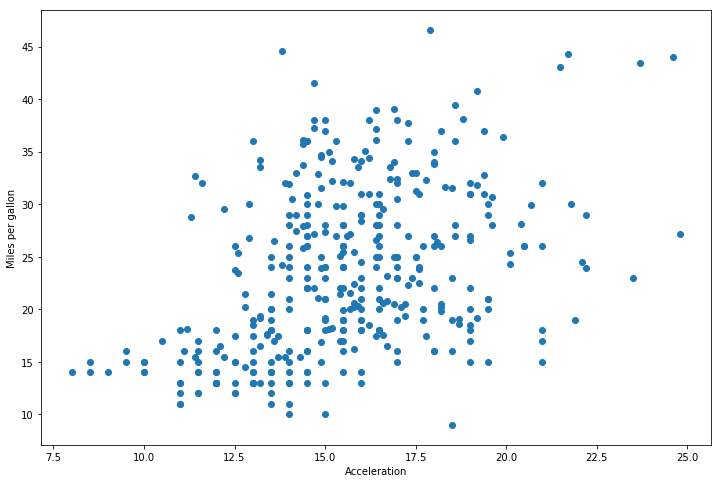

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["acceleration"], automobile_df["mpg"])

plt.xlabel("Acceleration")
plt.ylabel("Miles per gallon")

Cars with greater acceleration has higher mpg

Text(0, 0.5, 'Miles per gallon')

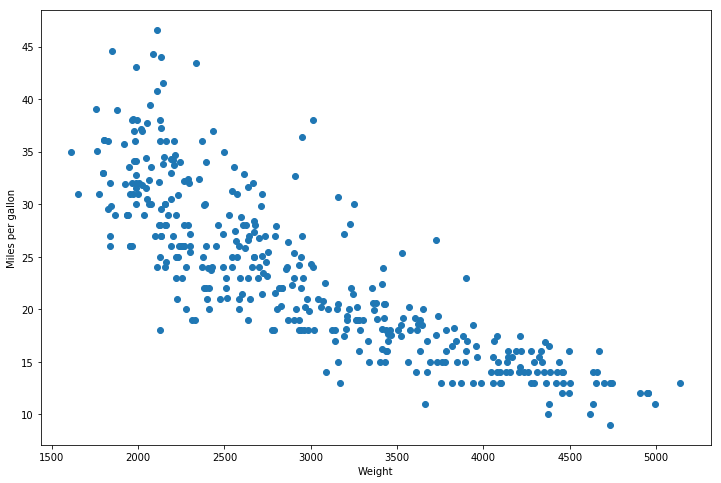

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["weight"], automobile_df["mpg"])

plt.xlabel("Weight")
plt.ylabel("Miles per gallon")

cars with greater weight have lower mpg

Text(0, 0.5, 'Miles per gallon')

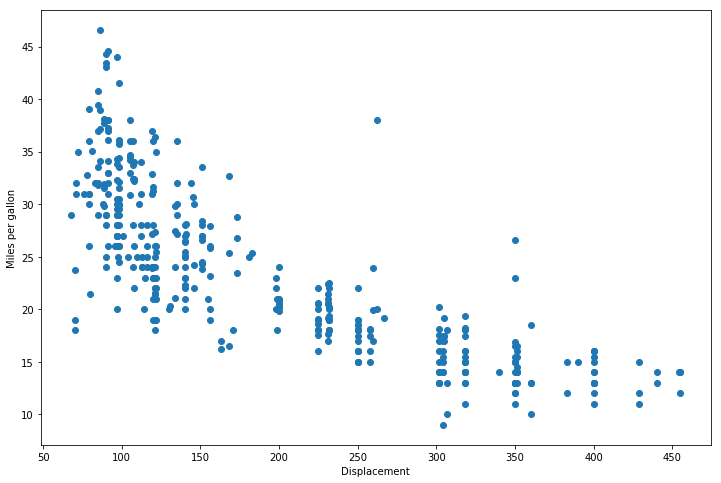

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["displacement"], automobile_df["mpg"])

plt.xlabel("Displacement")
plt.ylabel("Miles per gallon")

cars with greater displacement from the ground have lower mpgs

Text(0, 0.5, 'Miles per gallon')

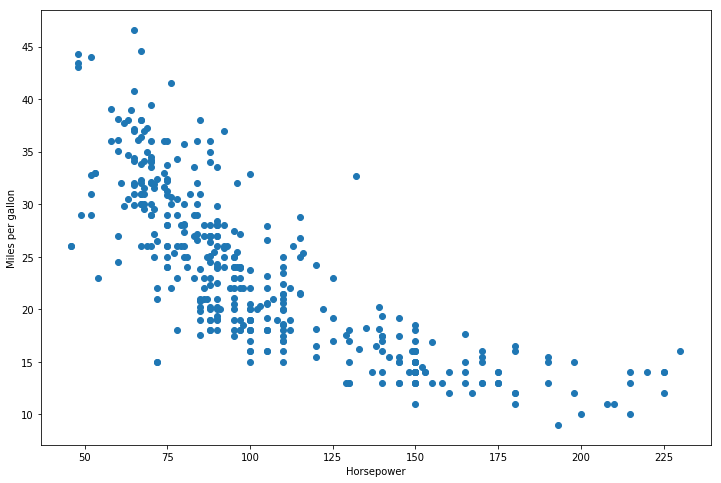

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["horsepower"], automobile_df["mpg"])

plt.xlabel("Horsepower")
plt.ylabel("Miles per gallon")

cars with greater horsepower(the rate at which the enging work/speed) have lower mpg(burns fuel faster)

Text(0, 0.5, 'Miles per gallon')

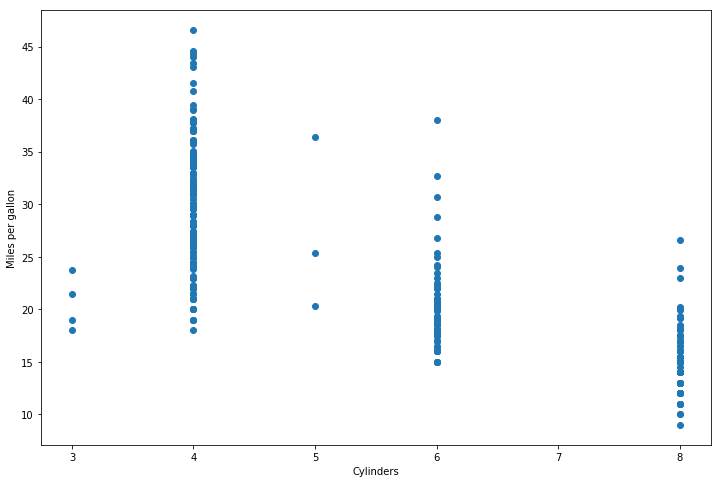

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df["cylinders"], automobile_df["mpg"])

plt.xlabel("Cylinders")
plt.ylabel("Miles per gallon")

Cars with lower cylinders have higher mpg(Fuel Economy)

In [26]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
Age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


Heat map is the graphical form of correlation result

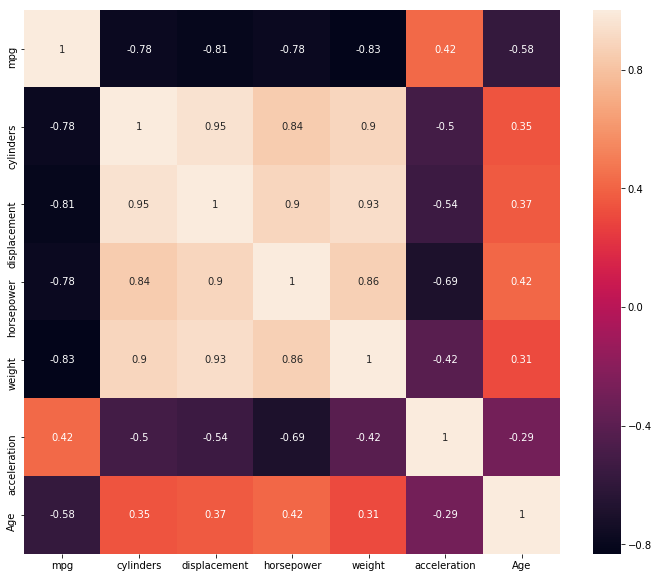

In [27]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(automobile_corr, annot = True)

In [28]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [29]:
automobile_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
393,27.0,4,140.0,86,2790,15.6,37
394,44.0,4,97.0,52,2130,24.6,37
395,32.0,4,135.0,84,2295,11.6,37
396,28.0,4,120.0,79,2625,18.6,37
397,31.0,4,119.0,82,2720,19.4,37


In [30]:
automobile_df[0:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49
5,15.0,8,429.0,198,4341,10.0,49
6,14.0,8,454.0,220,4354,9.0,49
7,14.0,8,440.0,215,4312,8.5,49
8,14.0,8,455.0,225,4425,10.0,49
9,15.0,8,390.0,190,3850,8.5,49


Reset or reshuffle our index to make our dataframe machine learning ready

In [31]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,Age
0,17.0,8,304.0,150,3672,11.5,47
1,29.8,4,134.0,90,2711,15.5,39
2,26.0,4,98.0,90,2265,15.5,46
3,13.0,8,400.0,170,4746,12.0,48
4,31.0,4,79.0,67,2000,16.0,45


In [32]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
Age               int64
dtype: object

In [33]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
Age             392 non-null int64
dtypes: float64(3), int64(4)
memory usage: 21.5 KB


Save our cleaned file to memory as "auto-mpg-processed.csv"

In [34]:
automobile_df.to_csv("auto-mpg-processed.csv", index=False)

# Linear Regression with One Feature- Horsepower

In [35]:
from sklearn.model_selection import train_test_split

x = automobile_df[["horsepower"]]
y = automobile_df["mpg"]

x_train, x_test, y_train,y_test = train_test_split (x,y,test_size=0.2)

1. Split our dataset into x_train(which is the horsepower used in training our model) and y_train(the corresponding target variable mpg also used in training our model)
2. We holdout x_test(we would use this feature(horsepower) to test our model to get a predicted "y_pred") and the y_test(mpg) will be used to compare our predicted y_pred(mpg) if it matches. This will tell us the overall performance of our model in making predictions.

We use 80% of our dataset to train our model and the remaining 20% to test our model for accuracy.

In [36]:
x_train.sample(5)

,horsepower
139,97
357,95
370,100
295,110
293,135


In [37]:
y_train.sample(5)

285    26.4
21     25.5
100    16.0
245    27.0
251    18.0
Name: mpg, dtype: float64

fit our simple linear regression model to the x-train and y_train to learn them. We also normalise our numerical variables so that they have same scale values

In [38]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [39]:
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.598432422554144


Print the R-square of our model, which showed that our model predict our target variable in the training dataset by 60%

In [40]:
y_pred = linear_model.predict(x_test)

we get the y_pred here by usinh our model on the test data(x_test)

In [41]:
from sklearn.metrics import r2_score
print("Testing score:", r2_score(y_test,y_pred))

Testing score: 0.6296250401099943


Our 60% score also showed that our model perfrom well on the test data it has not seen before

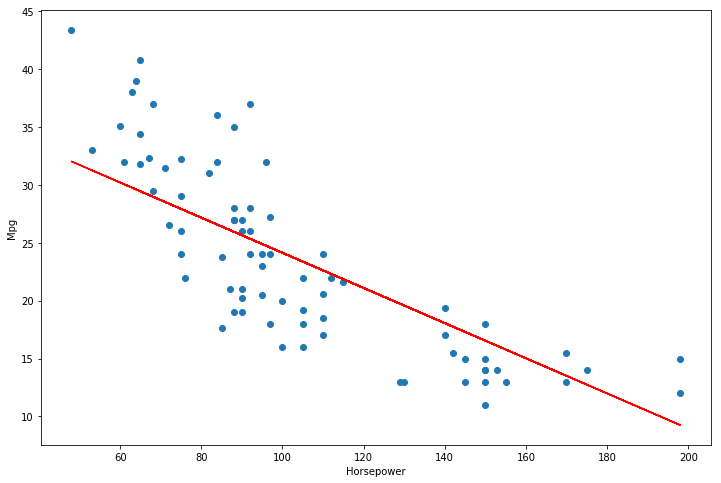

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = "r")

plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.show()

Plot our test data y-pred against our test data actual y_test to see how they compare. We fit a regression line which is not far from the data points showing that our R-square is high and model predict well the values of mpg from horsepower in our test data set.

# Let us try another Linear regression with one feature - age

In [45]:
x = automobile_df[["Age"]]
y = automobile_df["mpg"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [46]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.3256586711275823


In [47]:
y_pred = linear_model.predict(x_test)

In [48]:
print("Testing score: ", r2_score(y_test,y_pred))

Testing score:  0.3638563995758889


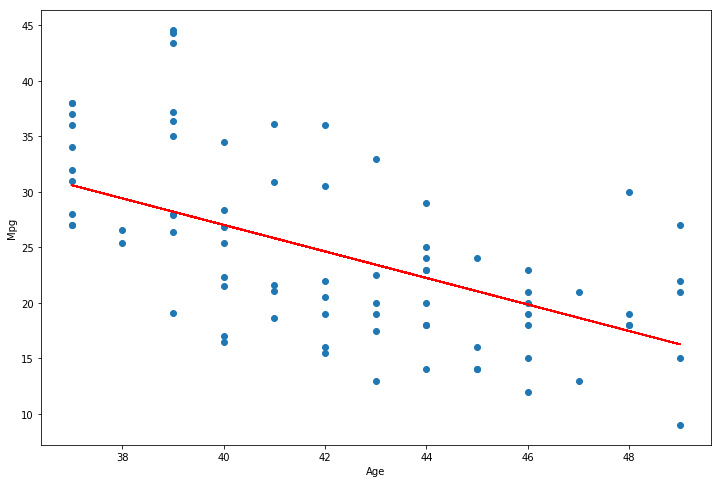

In [49]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = "r")

plt.xlabel("Age")
plt.ylabel("Mpg")
plt.show()

Age is not a strong predictor of mpg

# Linear Regression with Multiple Features

In [50]:
x = automobile_df[["displacement","horsepower", "weight"]]
y = automobile_df["mpg"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [52]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [53]:
print("Training score: ", linear_model.score(x_train,y_train))

Training score:  0.6904978183071382


In [54]:
y_pred = linear_model.predict(x_test)

In [55]:
print("Testing score: ", r2_score(y_test,y_pred))

Testing score:  0.7638593856918139


In [59]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values()

print(coef)

horsepower     -0.048518
weight         -0.005345
displacement   -0.002341
dtype: float64


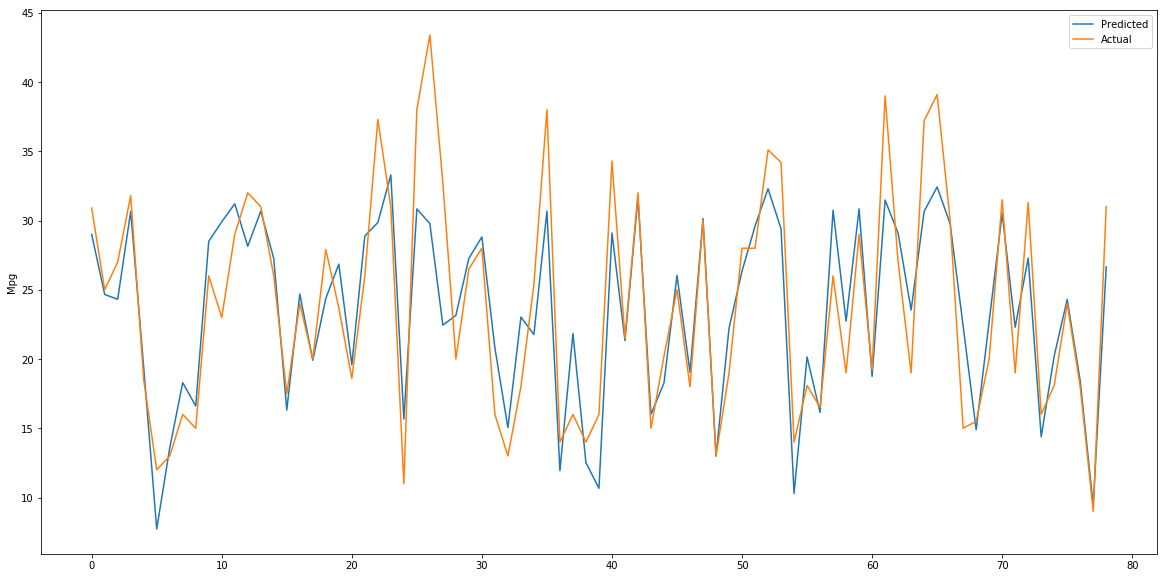

In [60]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label="Predicted")
plt.plot(y_test.values,label="Actual")

plt.ylabel("Mpg")

plt.legend()
plt.show()